In [14]:
#Initial Setup for plots etc

#!pip install plotnine
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random
import warnings
from scipy import stats
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind
from scipy.stats import shapiro
import pandas as pd
import seaborn as sns
import plotnine as p9
import glob
import os

from BSE import market_session
from BSE import Trader_PRZI_SHC




def plot_distribution(i):
    plt.figure()
    ax=sns.distplot(i)
    plt.axvline(np.mean(i),color="k",linestyle="dashed",linewidth=4)
    _,max_=plt.ylim()
    plt.text(i.mean()+(i.mean()/10),max_- max_ / 10, "Mean :{:.2f}".format(i.mean()))
    return plt.figure

def plot_trades(trial_id):
    prices_fname = trial_id + '_transactions.csv'
    x = np.empty(0)
    y = np.empty(0)
    with open(prices_fname, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time = float(row[1])
            price = float(row[2])
            x = np.append(x,time)
            y = np.append(y,price)

    plt.plot(x, y, 'x', color='black') 
    plt.xlabel('Time is (secs)')
    plt.ylabel('Price')
    
# Use this to run an experiment n times and plot all trades
def n_runs_plot(n, trial_id, start_time, end_time, traders_spec, order_sched):
    x = np.empty(0)
    y = np.empty(0)

    for i in range(n):
        trialId = trial_id + '_' + str(i)
        tdump = open(trialId + '_avg_balance.csv','w')

        market_session(trialId, start_time, end_time, traders_spec, order_sched, tdump, True, False)
        
        tdump.close()

        with open(trialId + '_transactions.csv', newline='') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                time = float(row[1])
                price = float(row[2])
                x = np.append(x,time)
                y = np.append(y,price)

    plt.plot(x, y, 'x', color='black')
    plt.xlabel('Time')
    plt.ylabel('Price');

# !!! Don't use on it's own   
def getorderprice(i, sched, n, mode):
    pmin = min(sched[0][0], sched[0][1])
    pmax = max(sched[0][0], sched[0][1])
    prange = pmax - pmin
    stepsize = prange / (n - 1)
    halfstep = round(stepsize / 2.0)

    if mode == 'fixed':
        orderprice = pmin + int(i * stepsize)
    elif mode == 'jittered':
        orderprice = pmin + int(i * stepsize) + random.randint(-halfstep, halfstep)
    elif mode == 'random':
        if len(sched) > 1:
            # more than one schedule: choose one equiprobably
            s = random.randint(0, len(sched) - 1)
            pmin = min(sched[s][0], sched[s][1])
            pmax = max(sched[s][0], sched[s][1])
        orderprice = random.randint(pmin, pmax)
    return orderprice    

# !!! Don't use on it's own
def make_supply_demand_plot(bids, asks):
    # total volume up to current order
    volS = 0
    volB = 0

    fig, ax = plt.subplots()
    plt.ylabel('Price')
    plt.xlabel('Quantity')
    
    pr = 0
    for b in bids:
        if pr != 0:
            # vertical line
            ax.plot([volB,volB], [pr,b], 'r-')
        # horizontal lines
        line, = ax.plot([volB,volB+1], [b,b], 'r-')
        volB += 1
        pr = b
    if bids:
        line.set_label('Demand')
        
    pr = 0
    for s in asks:
        if pr != 0:
            # vertical line
            ax.plot([volS,volS], [pr,s], 'b-')
        # horizontal lines
        line, = ax.plot([volS,volS+1], [s,s], 'b-')
        volS += 1
        pr = s
    if asks:
        line.set_label('Supply')
        
    if bids or asks:
        plt.legend()
    plt.show()

# Use this to plot supply and demand curves from supply and demand ranges and stepmode
def sup_dem(seller_num, sup_ranges, buyer_num, dem_ranges, stepmode):
    asks = []
    for s in range(seller_num):
        asks.append(getorderprice(s, sup_ranges, seller_num, stepmode))
    asks.sort()
    bids = []
    for b in range(buyer_num):
        bids.append(getorderprice(b, dem_ranges, buyer_num, stepmode))
    bids.sort()
    bids.reverse()
    
    make_supply_demand_plot(bids, asks) 

# plot sorted trades, useful is some situations - won't be used in this worksheet
def in_order_plot(trial_id):
    prices_fname = trial_id + '_transactions.csv'
    y = np.empty(0)
    with open(prices_fname, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            price = float(row[2])
            y = np.append(y,price)
    y = np.sort(y)
    x = list(range(len(y)))

    plt.plot(x, y, 'x', color='black')   

In [28]:
start_time = 0
end_time = 60 * 20

In [29]:
sup_range=(100,200)
dem_range=(100,200)

supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [sup_range], 'stepmode': 'fixed'}]
demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [dem_range], 'stepmode': 'fixed'}]

In [30]:
sellers_spec = [("PRSH",10),("PRSHN",10)]
buyers_spec = [("PRSH",10),("PRSHN",10)]
traders_spec ={"sellers" : sellers_spec, "buyers": buyers_spec}

In [31]:
order_interval = 60
order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
               'interval': order_interval, 'timemode': 'periodic'}

In [32]:
verbose = True
#tdump=open('Test_avg_balance.csv','w')
trial_id = 'Test'
dump_all = True
#market_session(trial_id, start_time, end_time, traders_spec, order_sched, tdump, dump_all, verbose)
#tdump.close()

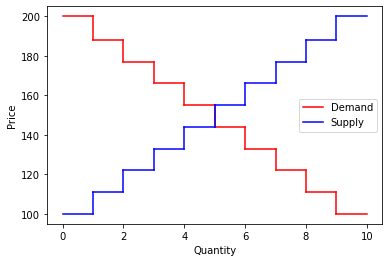

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=0.321822, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.341255, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.304405, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=0.591723, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.618265, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.596233, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=-0.429784, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.438937, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.438030, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=0.196506, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.176121, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.222850, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=0.040541, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.053743, start=0.000000, $=0.00000

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=0.104505, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.115325, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.124412, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=-0.253229, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.294724, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.293414, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=0.614052, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.611429, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.667356, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=0.050322, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.019854, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.050008, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=0.356797, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.409555, start=0.000000, $=0.00000

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=0.489755, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.508527, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.428746, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=-0.807797, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.787445, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.785600, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=-0.260483, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.244117, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.247534, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=-0.037621, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.046605, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.000183, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=-0.015500, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.058400, start=0.000000, $=0.

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=-0.031294, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.098175, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.074458, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=-0.936866, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.879161, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.870838, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=0.954348, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.909671, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.896858, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=0.315056, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.294800, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.296042, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=0.523120, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.477328, start=0.000000, $=0.00

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=0.244741, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.275727, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.219381, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=-0.729185, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.749669, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.774763, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=0.229463, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.199556, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.295969, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=0.943653, start=0.000000, $=0.000000, pps=0.000000
[1]: s=1.000000, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.962542, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=-0.850503, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.857021, start=0.000000, $=0.000

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=-0.122094, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.111176, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.051266, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=0.385497, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.438498, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.437724, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=-0.052407, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.004661, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.051934, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=0.910172, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.935603, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.896151, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=-0.485492, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.467027, start=0.000000, $=0.

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=0.800356, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.768426, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.813433, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=0.251496, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.207443, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.261764, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=-0.335837, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.364192, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.279335, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=0.088043, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.105804, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.057680, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=-0.888102, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.926203, start=0.000000, $=0.000

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=0.802655, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.811208, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.815513, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=-0.974181, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.975225, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.988944, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=0.269060, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.275887, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.298798, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=0.379350, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.393444, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.301287, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=0.786435, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.741792, start=0.000000, $=0.00000

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=-0.418436, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.511296, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.480236, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=0.462053, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.505599, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.418587, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=-0.263800, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.314908, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.292144, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=0.366909, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.431075, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.474107, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=-0.459260, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.483782, start=0.000000, $=0.

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=-0.787345, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.803958, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.804206, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=0.160036, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.143935, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.170171, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=-0.499666, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.448116, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.479175, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=0.720972, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.780502, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.740754, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=-0.635020, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.572137, start=0.000000, $=0.

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=-0.539306, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.574137, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.604056, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=-0.045414, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.025900, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.028494, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=-0.313575, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.255965, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.250897, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=0.965391, start=0.000000, $=0.000000, pps=0.000000
[1]: s=1.000000, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.953068, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=0.779131, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.754479, start=0.000000, $=0

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=0.968262, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.991106, start=0.000000, $=0.000000, pps=0.000000
[2]: s=1.000000, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=0.239705, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.248508, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.259163, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=0.569119, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.561047, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.643094, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=0.595262, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.554691, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.524488, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=-0.316561, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.351009, start=0.000000, $=0.000000

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=-0.791324, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.845559, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.768002, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=-0.812846, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.808664, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.779455, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=-0.716402, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.691143, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.698554, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=-0.834675, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.856826, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.824386, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=0.418107, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.324366, start=0.000000, 

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=-0.243060, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.118537, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.258454, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=-0.226107, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.247962, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.291361, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=0.619214, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.685065, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.720685, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=0.539210, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.529991, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.508430, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=0.875302, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.951882, start=0.000000, $=0.00

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=0.571229, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.522485, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.558406, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=-0.766497, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.754862, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.791975, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=-0.772756, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.731013, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.814309, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=-0.493459, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.545060, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.461916, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=0.865420, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.896438, start=0.000000, $=0

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=0.731011, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.743964, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.753464, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=-0.478859, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.468386, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.511169, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=-0.631125, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.649876, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.598819, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=0.890896, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.966165, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.867169, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=0.229495, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.314879, start=0.000000, $=0.00

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=-0.870836, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.942619, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.929407, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=0.484812, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.456176, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.523939, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=0.998242, start=0.000000, $=0.000000, pps=0.000000
[1]: s=1.000000, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.987779, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=-0.783859, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.777853, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.795491, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=-0.998987, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-1.000000, start=0.000000, $=0.

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=-0.778865, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.728938, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.702325, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=-0.086060, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.165587, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.030480, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=0.033105, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.095311, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.082641, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=0.761970, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.747179, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.687683, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=0.959902, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.950974, start=0.000000, $=0.0

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=0.582572, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.610891, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.558592, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=0.402005, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.455948, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.372151, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=0.742491, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.787172, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.820714, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=0.168125, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.151323, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.110179, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=-0.279311, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.175011, start=0.000000, $=0.000000

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=0.116804, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.133606, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.182561, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=0.957794, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.982064, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.889436, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=-0.383284, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.320332, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.321575, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=0.156400, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.109945, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.107749, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=0.228178, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.269771, start=0.000000, $=0.00000

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=0.493787, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.537389, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.473468, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=-0.344067, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.466079, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.306338, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=0.584584, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.532614, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.546593, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=-0.524026, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.507422, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.521090, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=0.480703, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.427838, start=0.000000, $=0.00

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=0.445591, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.473008, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.447186, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=-0.286185, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.269541, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.307673, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=-0.222026, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.280166, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.181139, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=0.855316, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.727142, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.874812, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=-0.362574, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.443364, start=0.000000, $=0.

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=-0.786482, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.841165, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.648831, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=-0.268784, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.293529, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.216041, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=0.897576, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.781002, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.813123, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=-0.749443, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.726879, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.832101, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=-0.315879, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.323388, start=0.000000, $

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=-0.942105, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.985548, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.949888, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=-0.465852, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.416821, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.541692, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=0.162321, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.147077, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.083577, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=-0.100409, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.126541, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.020982, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=0.372440, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.380645, start=0.000000, $=0

PRSH B00 PRSH: B00 active_strat=[0]:
[0]: s=-0.664351, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.620206, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.706839, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B01 PRSH: B01 active_strat=[0]:
[0]: s=0.961323, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.966617, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.926315, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B02 PRSH: B02 active_strat=[0]:
[0]: s=0.393114, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.374797, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.394623, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B03 PRSH: B03 active_strat=[0]:
[0]: s=0.529004, start=0.000000, $=0.000000, pps=0.000000
[1]: s=0.547876, start=0.000000, $=0.000000, pps=0.000000
[2]: s=0.601933, start=0.000000, $=0.000000, pps=0.000000


3
PRSH B04 PRSH: B04 active_strat=[0]:
[0]: s=-0.370471, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.295287, start=0.000000, $=0.000

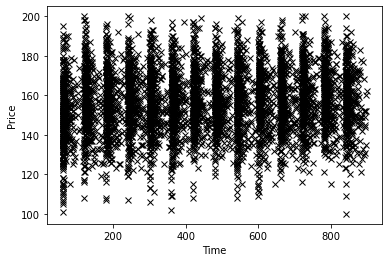

In [20]:
sup_dem(10, [sup_range], 10, [dem_range], 'fixed')
#plot_trades('Test')
n_runs_plot(50, trial_id, start_time, end_time, traders_spec, order_sched)

In [33]:
# merging the files
joined_files = os.path.join("", "Test_*_avg_balance.csv")
  
# A list of all joined files is returned
joined_list = glob.glob(joined_files)


columns=["Trial_id","Time elapsed","Buy","Sell","Trading Algorithm PRSH",
           "Total Profit for PRSH","Total Traders PRSH","Average Profit PRSH","Trading Algorithm PRSHN",
           "Total Profit for PRSHN","Total Traders ZIP","Average Profit PRSHN","Buy1","Sell1"]

dfcol=[]
for i,file_name in enumerate(joined_list):
    df1=pd.read_csv(file_name,names=columns,index_col=False)
    dfcol.append(df1)
df = pd.concat(dfcol)

#print(df.head())

In [34]:
#Tests for Normality (Shapiro-Wilk Test)
from scipy.stats import shapiro
shapiro=shapiro(df['Average Profit PRSH'])
print(shapiro)

ShapiroResult(statistic=0.9639795422554016, pvalue=1.3659009028096076e-34)


C:\Users\jh21478\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.


In [35]:
mannwhitneyu(df['Average Profit PRSH'],df['Average Profit PRSHN'])
#wilcoxon(df['Average Profit TA1'],df['Average Profit TA2'])

MannwhitneyuResult(statistic=14061939.0, pvalue=0.019945801006606527)

C:\Users\jh21478\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

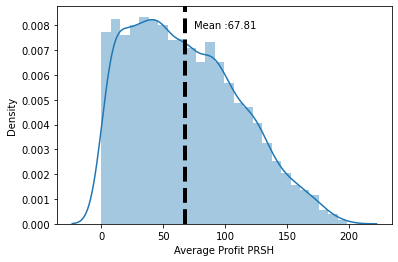

In [36]:
plot_distribution(df['Average Profit PRSH'])

In [37]:
#Rearranging the data for plotting
df1=pd.concat([df["Trading Algorithm PRSH"],df["Trading Algorithm PRSHN"]],axis=0)
df2=pd.concat([df["Average Profit PRSH"],df["Average Profit PRSHN"]],axis=0)
df3=pd.concat([df1,df2],axis=1)
df3.columns=["Trading Algorithm","Average Profit Per Trader"]
#print (df3)

C:\Users\jh21478\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

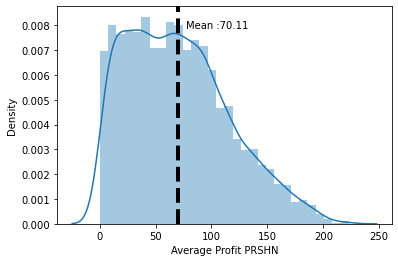

In [38]:
#Distribution of the PRSHN data
plot_distribution(df['Average Profit PRSHN'])

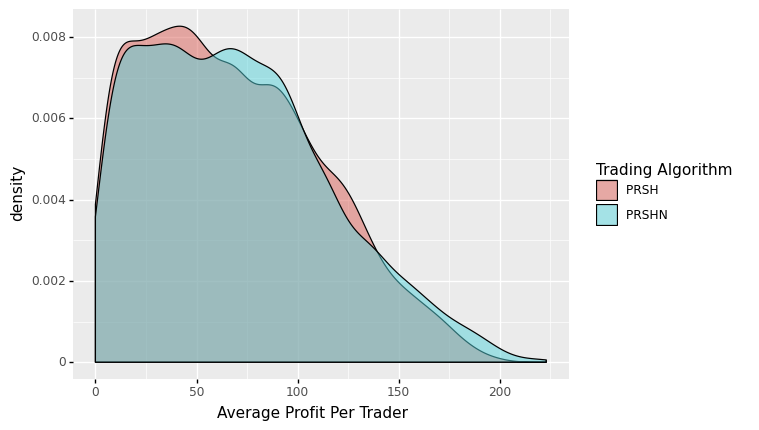

<ggplot: (133072412919)>

In [39]:
p9.ggplot(df3)+ p9.aes(x='Average Profit Per Trader', fill='Trading Algorithm') + p9.geom_density(alpha=0.5)

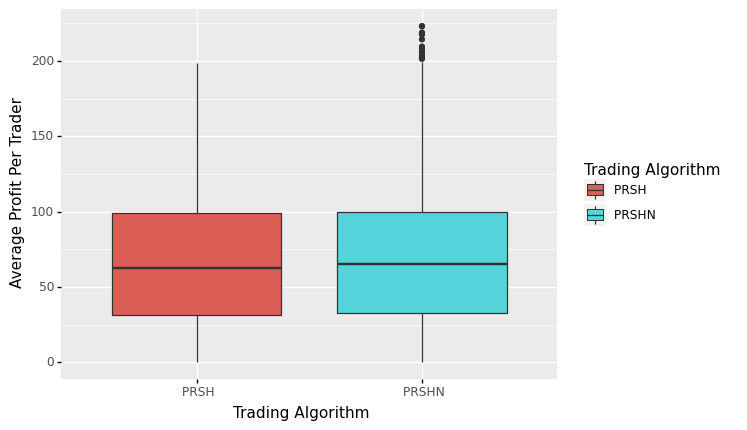

<ggplot: (133073551857)>

In [40]:
(p9.ggplot(df3)+ p9.aes(x='Trading Algorithm',y='Average Profit Per Trader', fill='Trading Algorithm')+ p9.geom_boxplot())